In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import geopandas as gpd

# How to build a GeoDataFrame

- See https://gist.github.com/sgillies/2217756 for the "`__geo_interface__`".
- But this basically copies GeoJSON, for which see https://tools.ietf.org/html/rfc7946

It's then as simple as this...

In [2]:
features = [{#"type": "Feature",
           "geometry": {
               "type": "Point",
               "coordinates": [102.0, 0.5]
           },
           "properties": {
               "prop0": "value0", "prop1": "value1"
           }
       }]

data = gpd.GeoDataFrame.from_features(features)
data

,geometry,prop0,prop1
0,POINT (102 0.5),value0,value1


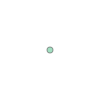

In [3]:
data.ix[0].geometry

In [4]:
features = [{#"type": "Feature",
           "geometry": {
               "type": "LineString",
               "coordinates": [[102.0, 0.5], [104, 3], [103, 2]]
           },
           "properties": {
               "prop0": "value0"
           }
       }]

data = gpd.GeoDataFrame.from_features(features)
data

,geometry,prop0
0,"LINESTRING (102 0.5, 104 3, 103 2)",value0


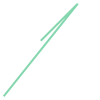

In [5]:
data.ix[0].geometry

In [6]:
features = [{#"type": "Feature",
           "geometry": {
               "type": "Polygon",
               "coordinates": [[[102.0, 0.5], [104, 3], [102, 2], [102,0.5]]]
           },
           "properties": {
               "prop0": "value0", "prop1": "value1"
           }
       }]

data = gpd.GeoDataFrame.from_features(features)
data

,geometry,prop0,prop1
0,"POLYGON ((102 0.5, 104 3, 102 2, 102 0.5))",value0,value1


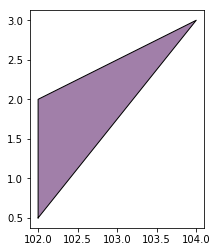

In [7]:
data.plot()

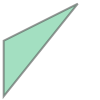

In [8]:
data.ix[0].geometry

## Notes

Some things that jumped out at me as I read the GeoJSON spec:

- Coordinates are always in the order: longitude, latitude.
- A "Polygon" is allowed to contain holes.  The "outer" edge should be ordered counter-clockwise, and each "inner" edge (i.e. a "hole") should be clockwise.
- If a polygon contains more than one array of points, then the first array is the outer edge, and the rest inner edges.
- Lines crossing the anti-meridian need to be split.  (I wonder what OSM does?)

# Worked example

Extract all buildings from the Illinois data.  This use the SQLite DB version.  To get data into this format:

- Download the Illinois data, in `osm.bz2` format, from http://download.geofabrik.de/north-america/us/illinois.html
- Run the script `convert_to_db.py` on this file, generating "illinois-latest.db"

In [9]:
# Allow to import without installing
import sys
sys.path.insert(0, "..")

In [10]:
import osmdigest.sqlite as sq

In [11]:
import os
filename = os.path.join("//tmp", "aaa", "illinois-latest.db")

In [12]:
db = sq.OSM_SQLite(filename)

We now proceed to find all the "ways" which have a tag of "building".
- One problem with converting this to a geopandas data-frame is that there are _vast_ number of tags, each of which would get their own column in the data-frame.  We need to limit this, so we will store _only_ the building tag, and any address tags (as that is our ultimate use case here.)
- Furthermore, we still end up with a _huge_ number of buildings, so we shall just look at those which have _some_ form of address data.
- A couple of the ways end up with only one or two nodes, which means they don't form a closed polygon.  Geopandas complains about this sort of thing, so we have to filter the data.

In [13]:
building_ways = [ db.complete_way(way) for way in db.ways() if "building" in way.tags ]

In [14]:
len(building_ways)

1063568

In [15]:
# Lots and lots of values!!
set( way.tags["building"] for way in building_ways )

{'Chicago Biology and  Medicine',
 'Commercial',
 'Community_Center',
 'Condominium',
 'Department_Building',
 'Faraday Hall',
 'Fort',
 'Gazebo',
 'Gym',
 'Lucky Dog',
 'Mausoleum',
 'Office_Space',
 'R3 Environmental',
 'Rec_Center',
 'Residential,_business,_restaurants',
 'YMCA',
 'Yoga_Studio',
 'amphitheatre',
 'apartments',
 'barn',
 'barn;garage',
 'barracks',
 'boathouse',
 'brewery',
 'bunker',
 'cabin',
 'canopy',
 'carport',
 'central_office',
 'chapel',
 'church',
 'cinema',
 'civic',
 'collapsed',
 'college',
 'commercial',
 'commercial;office',
 'commercial;roof',
 'condominium',
 'construction',
 'convent',
 'corridor',
 'demolished',
 'detached',
 'dormitory',
 'entrance',
 'exterior_walls_only',
 'factory',
 'farm',
 'farm_auxiliary',
 'field_house',
 'flats',
 'foundation',
 'garage',
 'garage;house',
 'garage;shed',
 'garages',
 'gazebo',
 'glasshouse',
 'grandstand',
 'greenhouse',
 'hangar',
 'historic',
 'hospital',
 'hotel',
 'house',
 'hut',
 'industrial',
 'ins

In [16]:
# Huge number of possible tags
set( name for way in building_ways for name in way.tags )

{'FIXME',
 'NHD:ComID',
 'NHD:FCode',
 'NHD:FDate',
 'NHD:FTYPE',
 'NHD:RESOLUTION',
 'NHD:ReachCode',
 'NHRP',
 'abandoned',
 'abandoned:aeroway',
 'abandoned:railway',
 'abstract',
 'access',
 'addr',
 'addr:1:housenumber',
 'addr:1:street',
 'addr:city',
 'addr:country',
 'addr:county',
 'addr:district',
 'addr:flats',
 'addr:full',
 'addr:housename',
 'addr:housenumber',
 'addr:place',
 'addr:postcode',
 'addr:province',
 'addr:state',
 'addr:street',
 'addr:street:name',
 'addr:street:prefix',
 'addr:street:suffix',
 'addr:street:type',
 'addr:unit',
 'address',
 'aeroway',
 'age_range',
 'agricultural',
 'alt_name',
 'alt_name_1',
 'amenity',
 'amenity_1',
 'amtrak_code',
 'animal_boarding',
 'architect',
 'area',
 'artist_name',
 'artwork_type',
 'atm',
 'automated',
 'barrier',
 'baseball',
 'bench',
 'bldgdescl',
 'brand',
 'bridge',
 'buffet',
 'building',
 'building:architecture',
 'building:colour',
 'building:facade:colour',
 'building:height',
 'building:id',
 'building:l

In [17]:
building_ways = [way for way in building_ways
    if any(key.startswith("addr") for key in way.tags) ]
len(building_ways)

499552

In [18]:
building_ways[0]

RichWay(12412091 ->  [Node(939903733 @ [41.7855911,-87.7424176] {}), Node(939903734 @ [41.7849958,-87.7431765] {}), Node(939903737 @ [41.7849803,-87.743156] {}), Node(112986634 @ [41.7847358,-87.7434739] {}), Node(939903740 @ [41.7847996,-87.7435634] {}), Node(939903742 @ [41.7847718,-87.7435956] {}), Node(939903744 @ [41.7848543,-87.7437106] {}), Node(939903746 @ [41.7848831,-87.7436777] {}), Node(112986635 @ [41.7849496,-87.7437723] {}), Node(939903749 @ [41.7851956,-87.7434571] {}), Node(939903751 @ [41.7851836,-87.7434363] {}), Node(4269213685 @ [41.786328,-87.7419863] {}), Node(112986641 @ [41.7863383,-87.7419732] {}), Node(939903754 @ [41.786506,-87.7419776] {}), Node(939903756 @ [41.7865052,-87.7420529] {}), Node(939903758 @ [41.7867805,-87.7420617] {}), Node(939903760 @ [41.7867813,-87.7420285] {}), Node(939903763 @ [41.7872888,-87.7420443] {}), Node(939903765 @ [41.7872893,-87.741933] {}), Node(112986642 @ [41.7876097,-87.7419356] {}), Node(4382397717 @ [41.7878088,-87.7422142

In [19]:
features = []
for way in building_ways:
    feature = {"properties": {"osm_id" : way.osm_id}}
    feature["geometry"] = {"type": "Polygon", "coordinates": []}
    feature["geometry"]["coordinates"] = [[ [node.longitude, node.latitude] for node in way.complete_nodes ]]
    for key, value in way.tags.items():
        if key.startswith("building") or key.startswith("addr"):
            feature["properties"][key] = value
    features.append(feature)

In [20]:
features[0]

{'geometry': {'coordinates': [[[-87.7424176, 41.7855911],
    [-87.7431765, 41.7849958],
    [-87.743156, 41.7849803],
    [-87.7434739, 41.7847358],
    [-87.7435634, 41.7847996],
    [-87.7435956, 41.7847718],
    [-87.7437106, 41.7848543],
    [-87.7436777, 41.7848831],
    [-87.7437723, 41.7849496],
    [-87.7434571, 41.7851956],
    [-87.7434363, 41.7851836],
    [-87.7419863, 41.786328],
    [-87.7419732, 41.7863383],
    [-87.7419776, 41.786506],
    [-87.7420529, 41.7865052],
    [-87.7420617, 41.7867805],
    [-87.7420285, 41.7867813],
    [-87.7420443, 41.7872888],
    [-87.741933, 41.7872893],
    [-87.7419356, 41.7876097],
    [-87.7422142, 41.7878088],
    [-87.7422668, 41.7878464],
    [-87.7423076, 41.7878756],
    [-87.742432, 41.7879644],
    [-87.7425292, 41.788034],
    [-87.7427322, 41.788179],
    [-87.7428241, 41.7882447],
    [-87.7432774, 41.7882327],
    [-87.7432788, 41.7881657],
    [-87.7434947, 41.7881607],
    [-87.7446098, 41.7872773],
    [-87.7445052, 4

In [21]:
odd = []
for i, feat in enumerate(features):
    if len(feat["geometry"]["coordinates"][0]) <= 2:
        print("Odd geometry for {}".format(feat["properties"]["osm_id"]))
        odd.append(i)

for i, index in enumerate(odd):
    del features[index - i]

Odd geometry for 144710191


In [22]:
gdf = gpd.GeoDataFrame.from_features(features)

In [23]:
gdf = gdf.set_index("osm_id")

In [27]:
gdf.ix[12412091]

addr                                                                         NaN
addr:1:housenumber                                                           NaN
addr:1:street                                                                NaN
addr:city                                                                    NaN
addr:country                                                                 NaN
addr:county                                                                  NaN
addr:district                                                                NaN
addr:flats                                                                   NaN
addr:full                                                                    NaN
addr:housename                                                               NaN
addr:housenumber                                                       5600-5800
addr:place                                                                   NaN
addr:postcode               

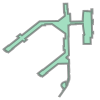

In [28]:
gdf.ix[12412091].geometry

In [31]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [32]:
gdf.to_file("test", driver="GeoJSON")

## Load it back in

In [2]:
import geopandas as gpd

gpd.read_file("test")

,addr,addr:1:housenumber,addr:1:street,addr:city,addr:country,addr:county,addr:district,addr:flats,addr:full,addr:housename,...,building:id,building:levels,building:levels:underground,building:material,building:part,building:start_date,building:use,building_1,building_2,geometry
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.7424176 41.7855911, -87.7431765 ..."
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.7402079 41.7897154, -87.7401323 ..."
2,None,None,None,None,None,None,None,None,None,None,...,None,2,None,None,None,None,None,None,None,"POLYGON ((-87.9343908 42.0298834, -87.9341208 ..."
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.65399840000001 41.9219337, -87.6..."
4,None,None,None,Chicago,None,None,None,None,None,None,...,None,2,None,None,None,None,None,None,None,"POLYGON ((-87.63993170000001 41.8837706, -87.6..."
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.6353766 41.9238402, -87.6353823 ..."
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.635548 41.9273242, -87.634963 41..."
7,None,None,None,Chicago,US,None,None,None,None,None,...,None,3,None,None,None,None,None,None,None,"POLYGON ((-87.6313337 41.9124448, -87.63167110..."
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.683244 41.93122, -87.6838078 41...."
9,None,None,None,Chicago,None,None,None,None,None,None,...,None,5,None,None,None,None,None,None,None,"POLYGON ((-87.62157379999999 41.897469, -87.62..."
